In [14]:
%load_ext autoreload
%autoreload 2

import torch

from data.generation import InjectiveLinearDecoder
from spaces import NSphereSpace
from encoders import construct_mlp_encoder

from simclr.simclr import SimCLR

from visualization_utils.spheres import visualize_spheres_side_by_side
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Training an encoder where we map from Sphere to R^4 injectively and then map back to the sphere

from experiment_utils.linear import perform_linear_experiment

latent_dim = 3

tau = 0.3
kappa = 1 / tau

iterations_default = 20000
batch_default = 2000

torch.manual_seed(789)

sphere = NSphereSpace(latent_dim)

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Using device', device)

Using device cuda


Linear control score: 1.0
Permutation control score: 1.0
Loss: 7.4891791343688965 Samples processed: 1 linear disentanglement: 0.9999997615814209 permutation disentanglement: 0.42052462697029114 angle_preservation_error: 0.28139886260032654
Loss: 7.476527690887451 Samples processed: 21 linear disentanglement: 0.9999997615814209 permutation disentanglement: 0.42658481001853943 angle_preservation_error: 0.2784998118877411
Loss: 7.46820068359375 Samples processed: 41 linear disentanglement: 0.9999997615814209 permutation disentanglement: 0.4279301166534424 angle_preservation_error: 0.2717180848121643
Loss: 7.4392290115356445 Samples processed: 61 linear disentanglement: 0.9999997615814209 permutation disentanglement: 0.4290526807308197 angle_preservation_error: 0.2697881758213043
Loss: 7.398693561553955 Samples processed: 81 linear disentanglement: 0.9999997615814209 permutation disentanglement: 0.4287191331386566 angle_preservation_error: 0.26767951250076294
Loss: 7.437592029571533 Sampl

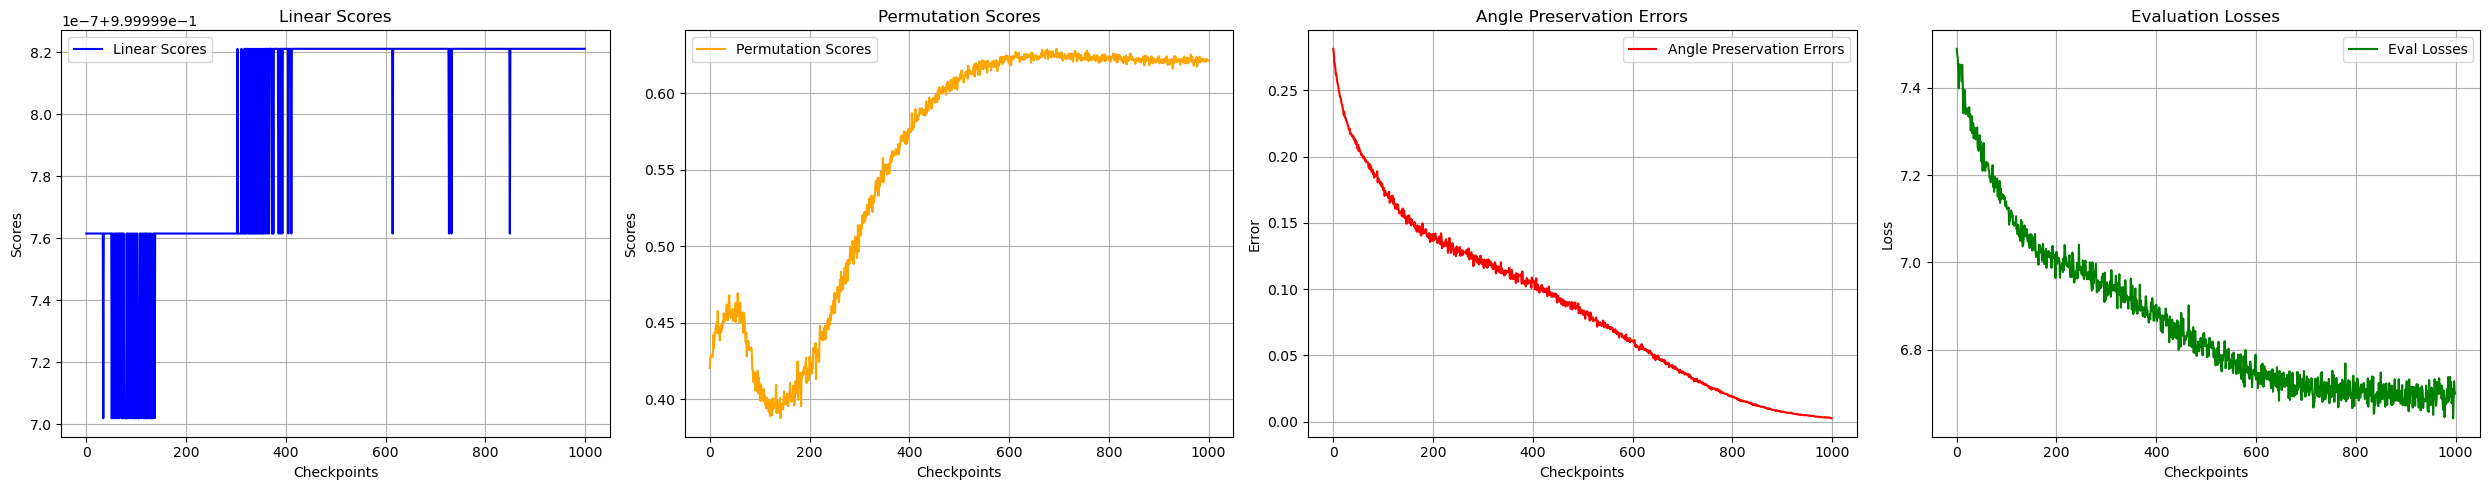

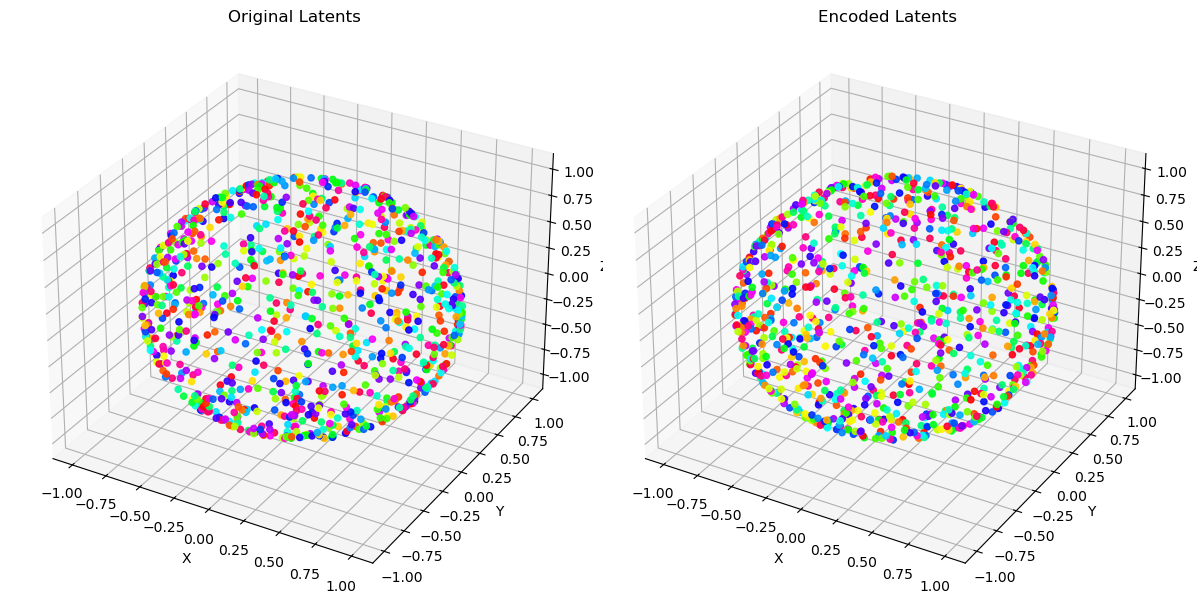

In [16]:
# 4 Dimensions

from visualization_utils.scoring import plot_scores

import torch.nn as nn

f = nn.Linear(4, 3)

latent_dim = 3

tau = 0.3
kappa = 1 / tau

h, scores = perform_linear_experiment(4, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device, f)

plot_scores(plt, scores)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 7.599653720855713 Samples processed: 1 linear disentanglement: 0.3340820074081421 permutation disentanglement: 0.000179290771484375 angle_preservation_error: 0.49908870458602905
Loss: 7.350221633911133 Samples processed: 21 linear disentanglement: 0.3363148868083954 permutation disentanglement: 0.06785353273153305 angle_preservation_error: 0.4067721664905548
Loss: 7.3116583824157715 Samples processed: 41 linear disentanglement: 0.33396434783935547 permutation disentanglement: 0.07698776572942734 angle_preservation_error: 0.35089758038520813
Loss: 7.297707557678223 Samples processed: 61 linear disentanglement: 0.32842737436294556 permutation disentanglement: 0.09682333469390869 angle_preservation_error: 0.3222196698188782
Loss: 7.292683124542236 Samples processed: 81 linear disentanglement: 0.33625897765159607 permutation disentanglement: 0.10958194732666016 angle_preservation_error: 0.3195704519748688
Loss: 7.29135036468505

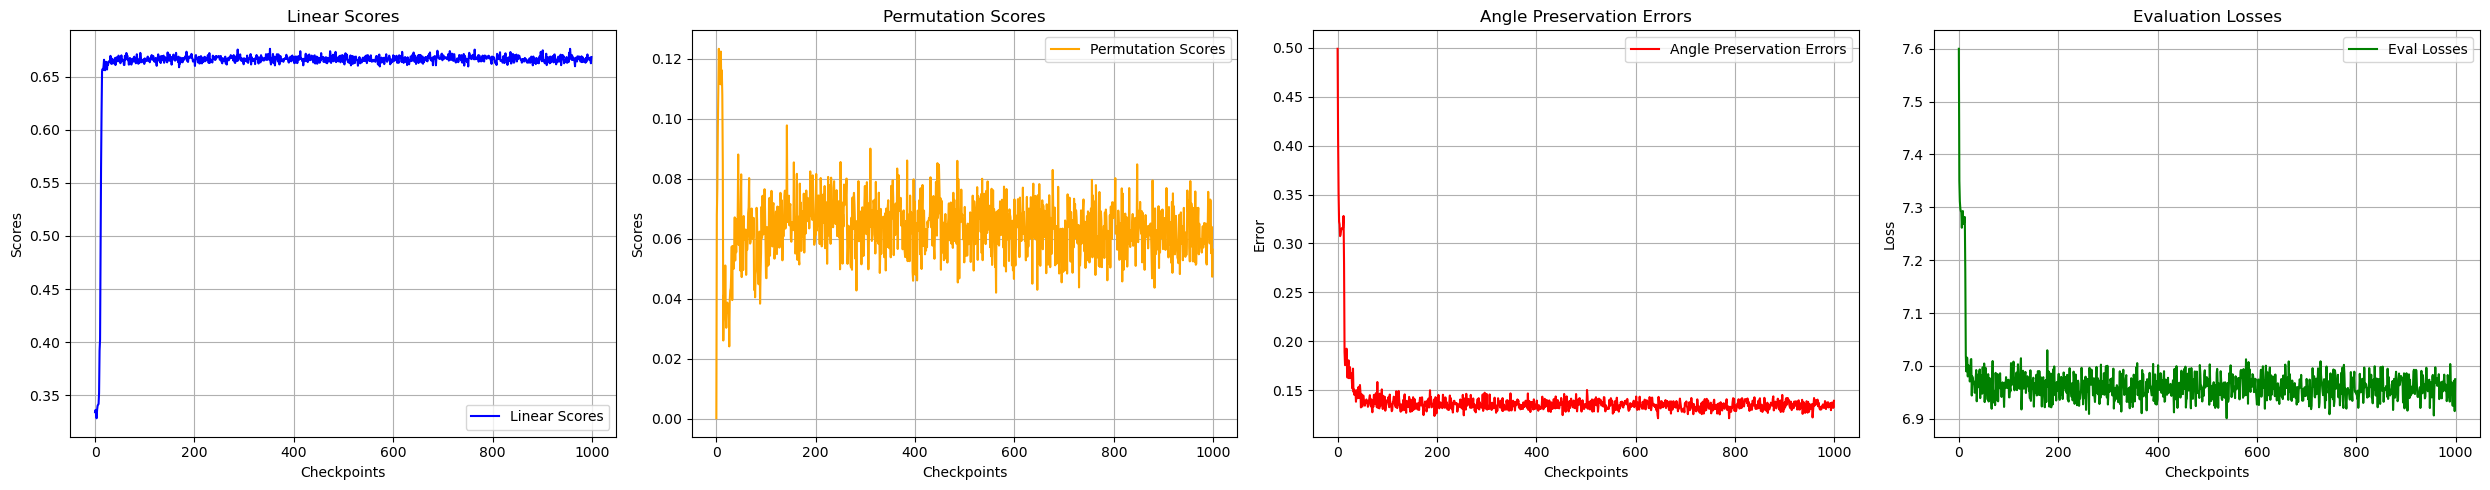

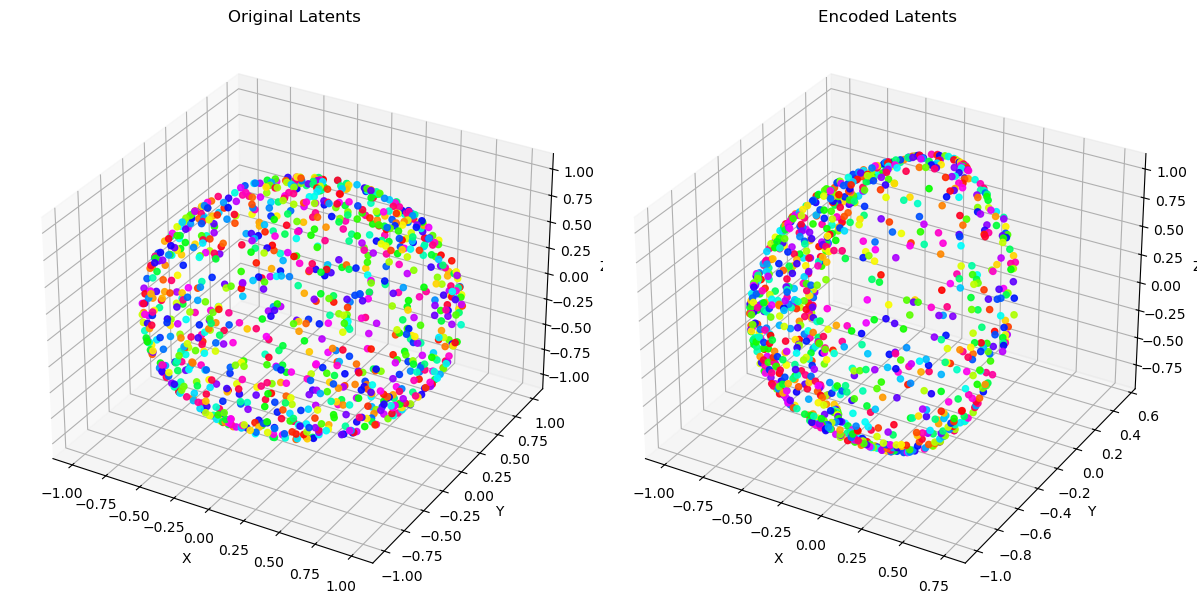

In [18]:
# 4 Dimensions

latent_dim = 3

tau = 0.3
kappa = 1 / tau

h, scores = perform_linear_experiment(4, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

plot_scores(plt, scores)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.611074447631836 Samples processed: 1 linear disentanglement: 0.9999982714653015 permutation disentanglement: 0.15588325262069702 angle_preservation_error: 0.4508310556411743
Loss: 8.484429359436035 Samples processed: 21 linear disentanglement: 0.9999982714653015 permutation disentanglement: 0.15735115110874176 angle_preservation_error: 0.44966402649879456
Loss: 8.6576566696167 Samples processed: 41 linear disentanglement: 0.999998152256012 permutation disentanglement: 0.15339986979961395 angle_preservation_error: 0.47236913442611694
Loss: 8.672451972961426 Samples processed: 61 linear disentanglement: 0.9999983310699463 permutation disentanglement: 0.15945525467395782 angle_preservation_error: 0.45872893929481506
Loss: 8.4049654006958 Samples processed: 81 linear disentanglement: 0.9999983906745911 permutation disentanglement: 0.14319932460784912 angle_preservation_error: 0.418507844209671
Loss: 8.419909477233887 Samples 

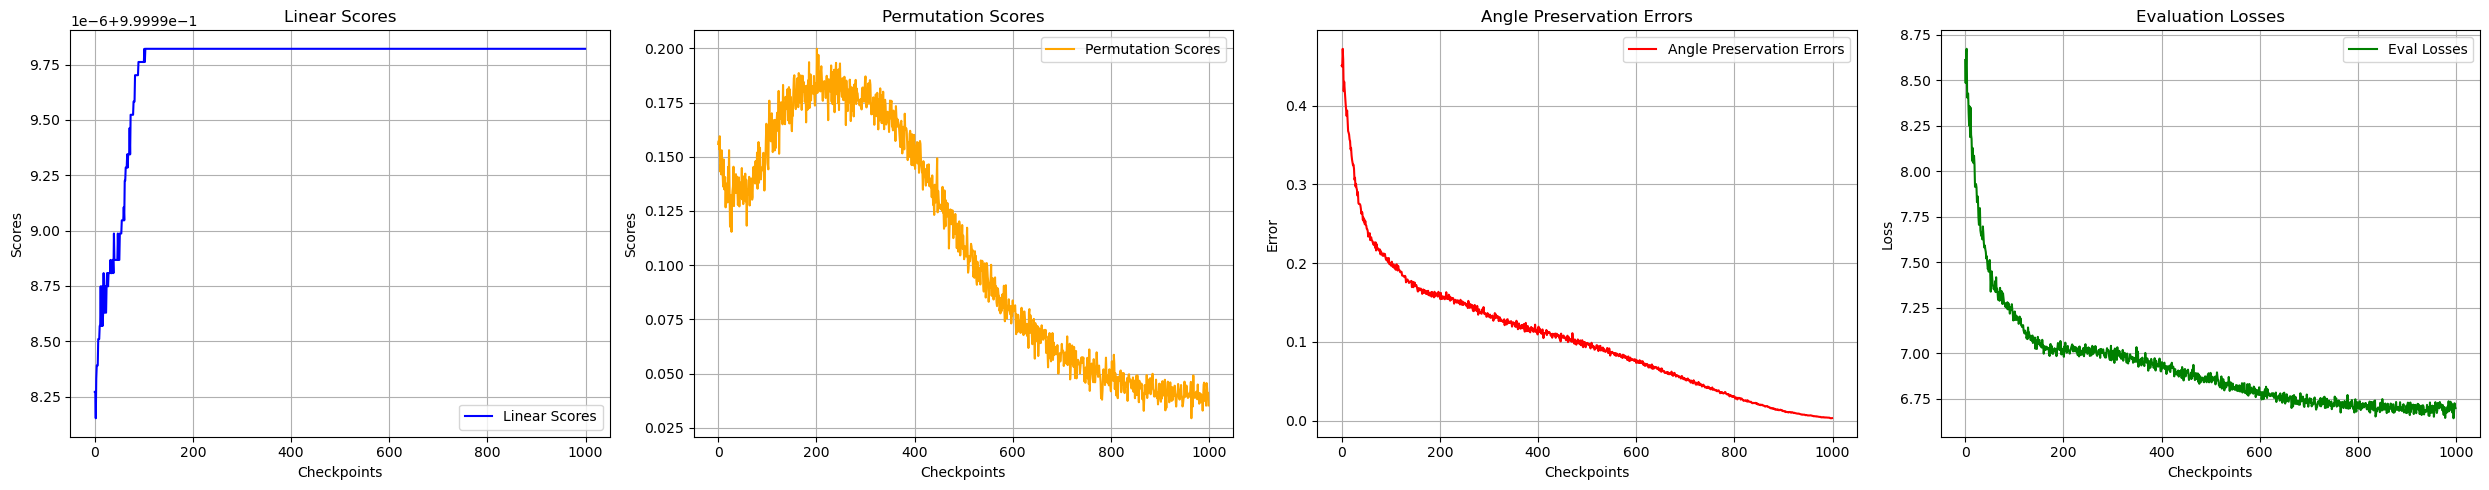

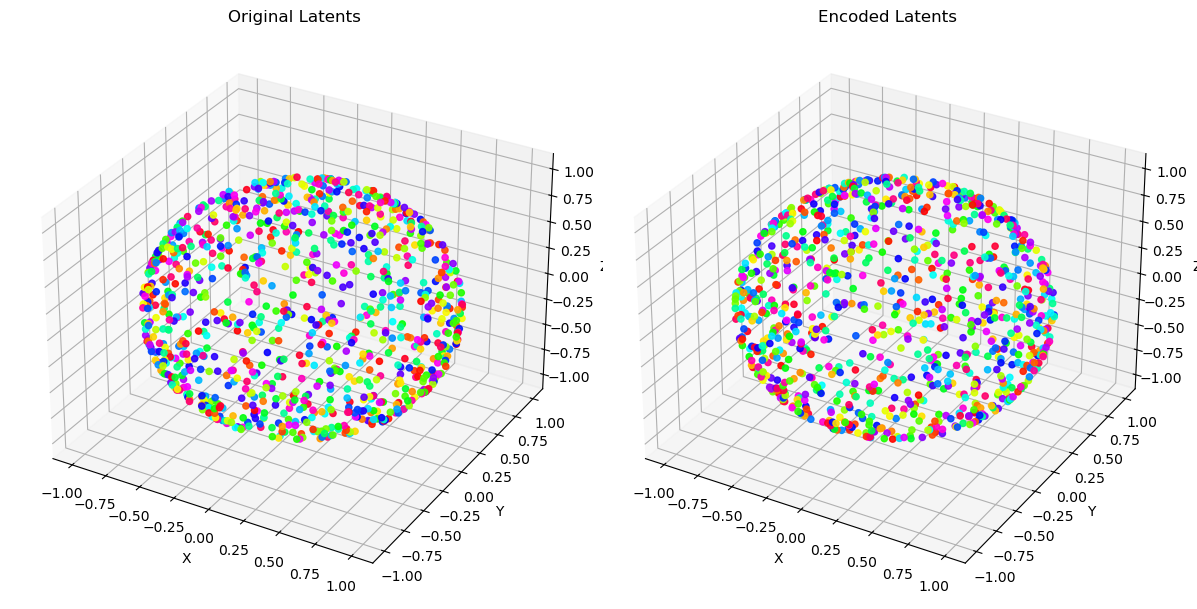

In [19]:
# 5 Dimensions

f = nn.Linear(5, 3)

h, scores = perform_linear_experiment(5, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device, f=f)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

plot_scores(plt, scores)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 7.6008100509643555 Samples processed: 1 linear disentanglement: 0.5242989659309387 permutation disentanglement: 0.0004447301325853914 angle_preservation_error: 0.4997757375240326
Loss: 7.472031593322754 Samples processed: 21 linear disentanglement: 0.6205661296844482 permutation disentanglement: 0.05142055079340935 angle_preservation_error: 0.4669952094554901
Loss: 7.318343639373779 Samples processed: 41 linear disentanglement: 0.5845842957496643 permutation disentanglement: 0.1838984340429306 angle_preservation_error: 0.34147441387176514
Loss: 7.201455593109131 Samples processed: 61 linear disentanglement: 0.6279800534248352 permutation disentanglement: 0.2559625208377838 angle_preservation_error: 0.30625391006469727
Loss: 7.018640995025635 Samples processed: 81 linear disentanglement: 0.651587963104248 permutation disentanglement: 0.24372799694538116 angle_preservation_error: 0.20283980667591095
Loss: 6.9775238037109375 S

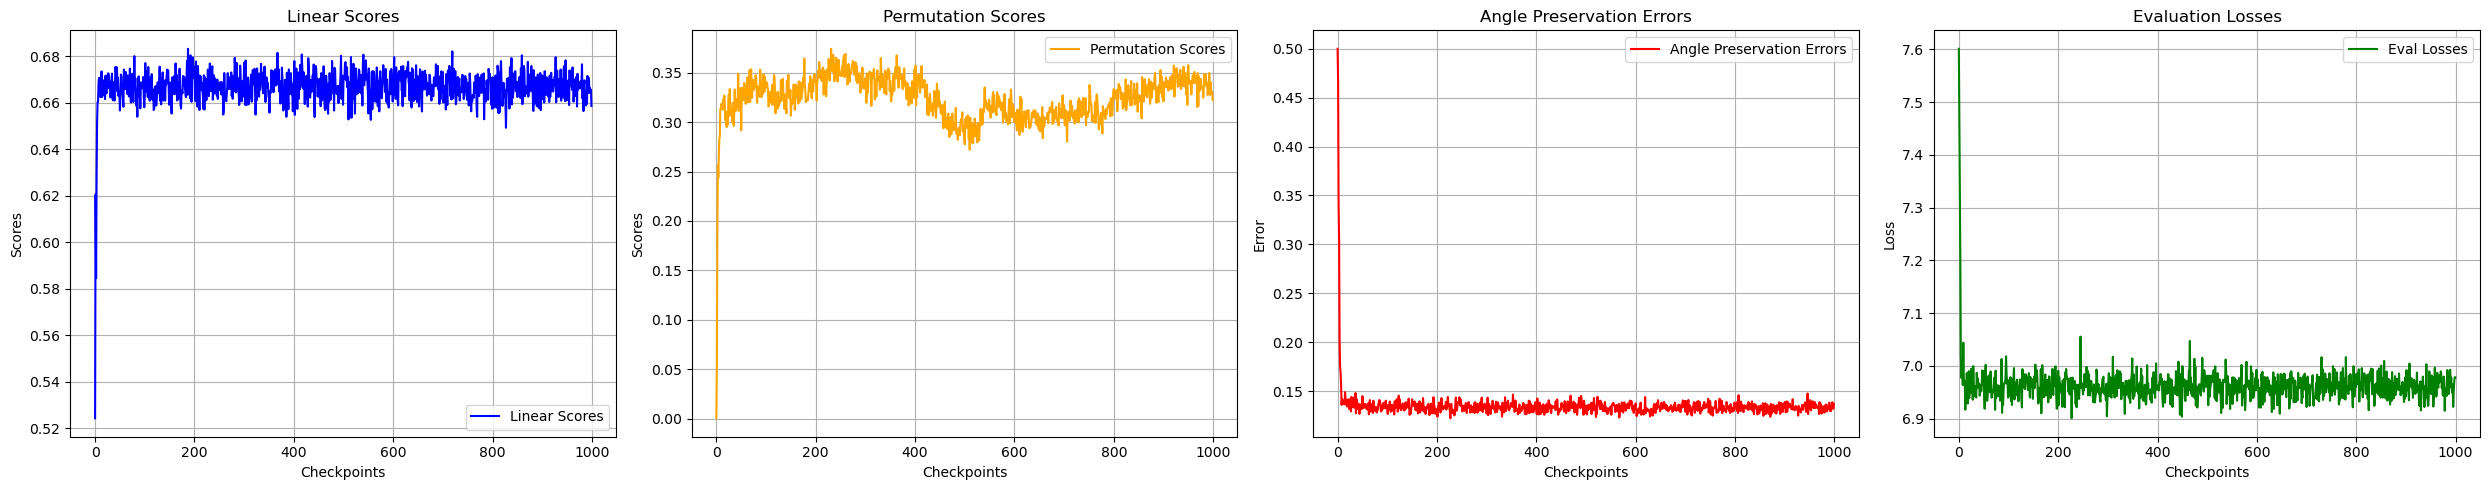

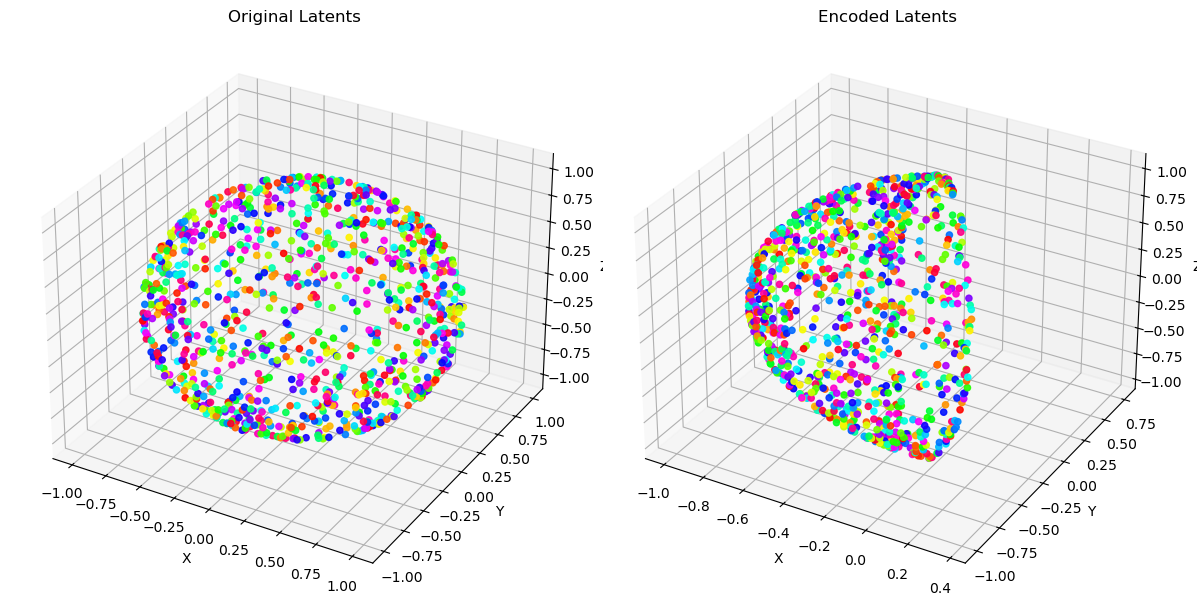

In [20]:
# 5 Dimensions

h, scores = perform_linear_experiment(5, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

plot_scores(plt, scores)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 7.381924629211426 Samples processed: 1 linear disentanglement: 0.9999976754188538 permutation disentanglement: 0.3531089723110199 angle_preservation_error: 0.22233763337135315
Loss: 7.402851104736328 Samples processed: 21 linear disentanglement: 0.9999979138374329 permutation disentanglement: 0.3630391061306 angle_preservation_error: 0.22134681046009064
Loss: 7.371633529663086 Samples processed: 41 linear disentanglement: 0.999998152256012 permutation disentanglement: 0.35762545466423035 angle_preservation_error: 0.21870292723178864
Loss: 7.365013122558594 Samples processed: 61 linear disentanglement: 0.9999983906745911 permutation disentanglement: 0.3578709065914154 angle_preservation_error: 0.21708545088768005
Loss: 7.372368335723877 Samples processed: 81 linear disentanglement: 0.9999986290931702 permutation disentanglement: 0.3505581319332123 angle_preservation_error: 0.22077639400959015
Loss: 7.366326332092285 Samples 

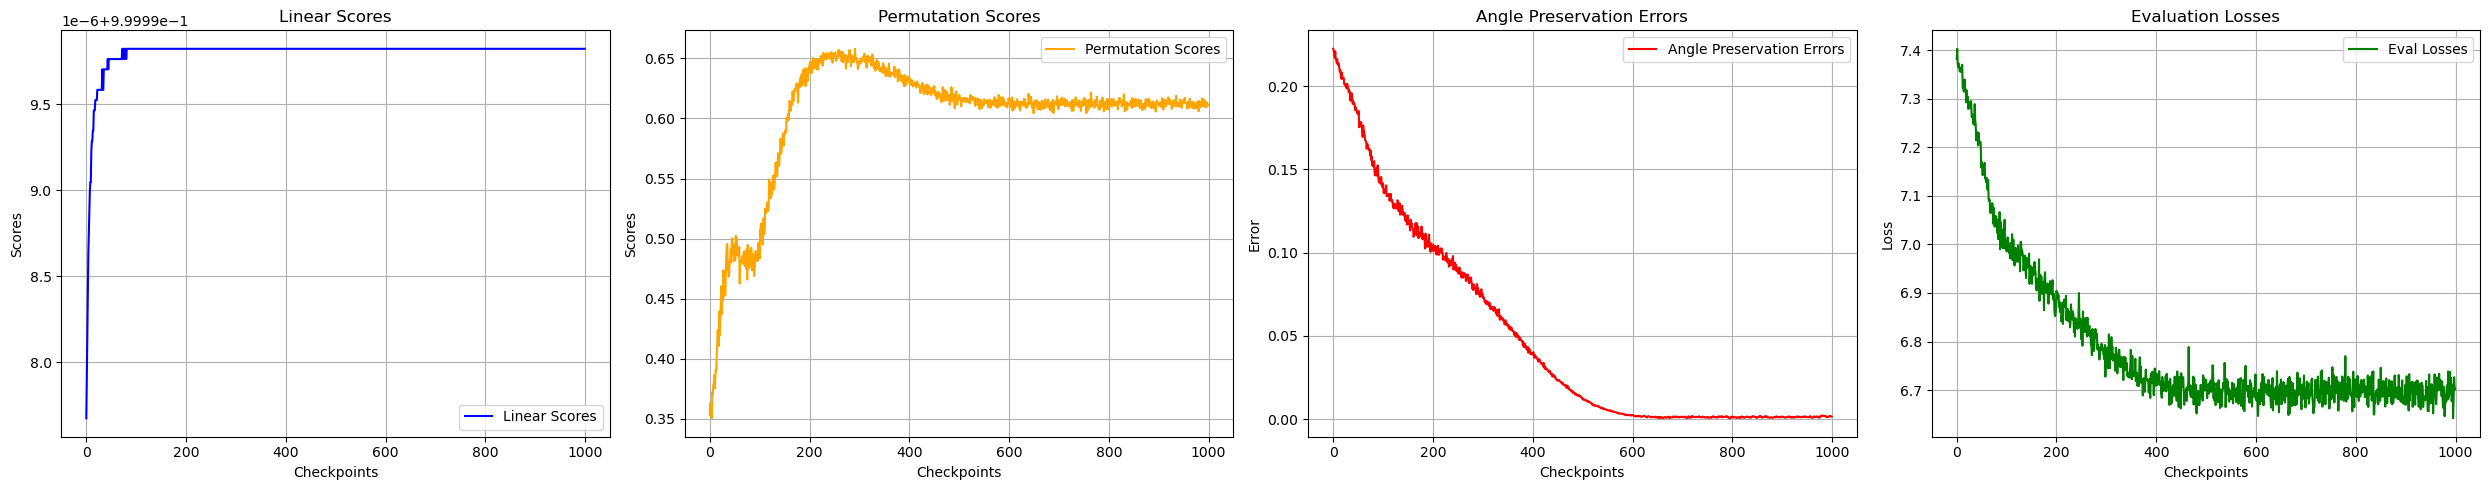

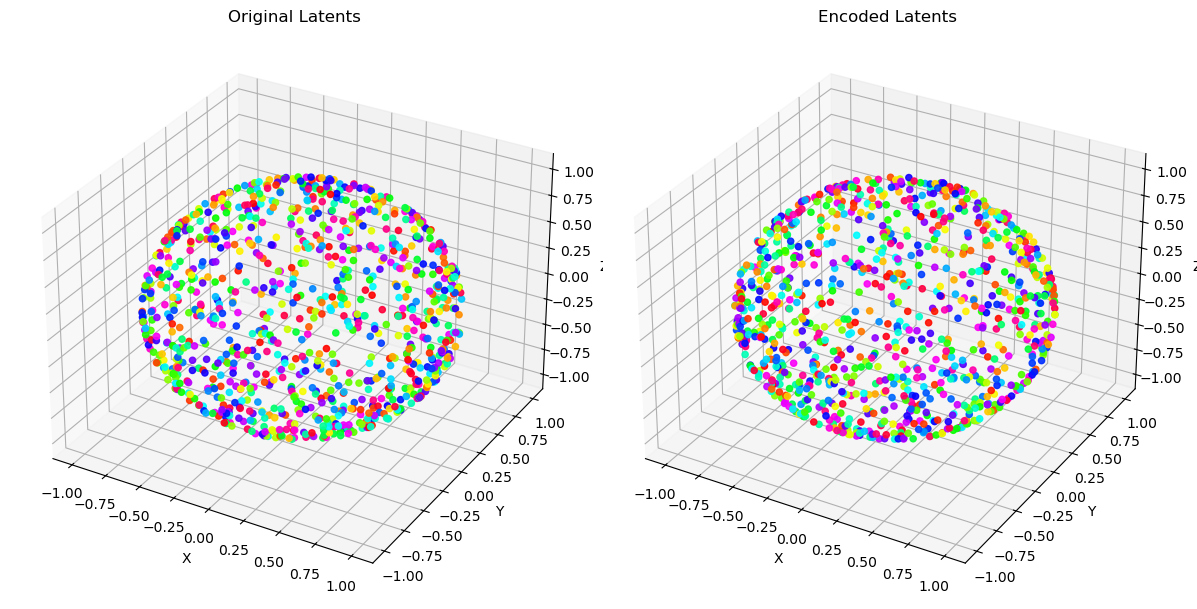

In [21]:
# 6 Dimensions

f = nn.Linear(6, 3)

h, scores = perform_linear_experiment(6, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device, f=f)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

plot_scores(plt, scores)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 7.600827693939209 Samples processed: 1 linear disentanglement: 0.5893210768699646 permutation disentanglement: 0.00030519565916620195 angle_preservation_error: 0.4996671974658966
Loss: 7.463324546813965 Samples processed: 21 linear disentanglement: 0.5481162667274475 permutation disentanglement: 0.025778472423553467 angle_preservation_error: 0.4638203978538513
Loss: 7.312588691711426 Samples processed: 41 linear disentanglement: 0.45334383845329285 permutation disentanglement: 0.11702551692724228 angle_preservation_error: 0.3326980769634247
Loss: 7.307073593139648 Samples processed: 61 linear disentanglement: 0.5913341045379639 permutation disentanglement: 0.12359318882226944 angle_preservation_error: 0.3178879916667938
Loss: 7.233235836029053 Samples processed: 81 linear disentanglement: 0.6585841774940491 permutation disentanglement: 0.1301717758178711 angle_preservation_error: 0.31546759605407715
Loss: 6.991214752197266 

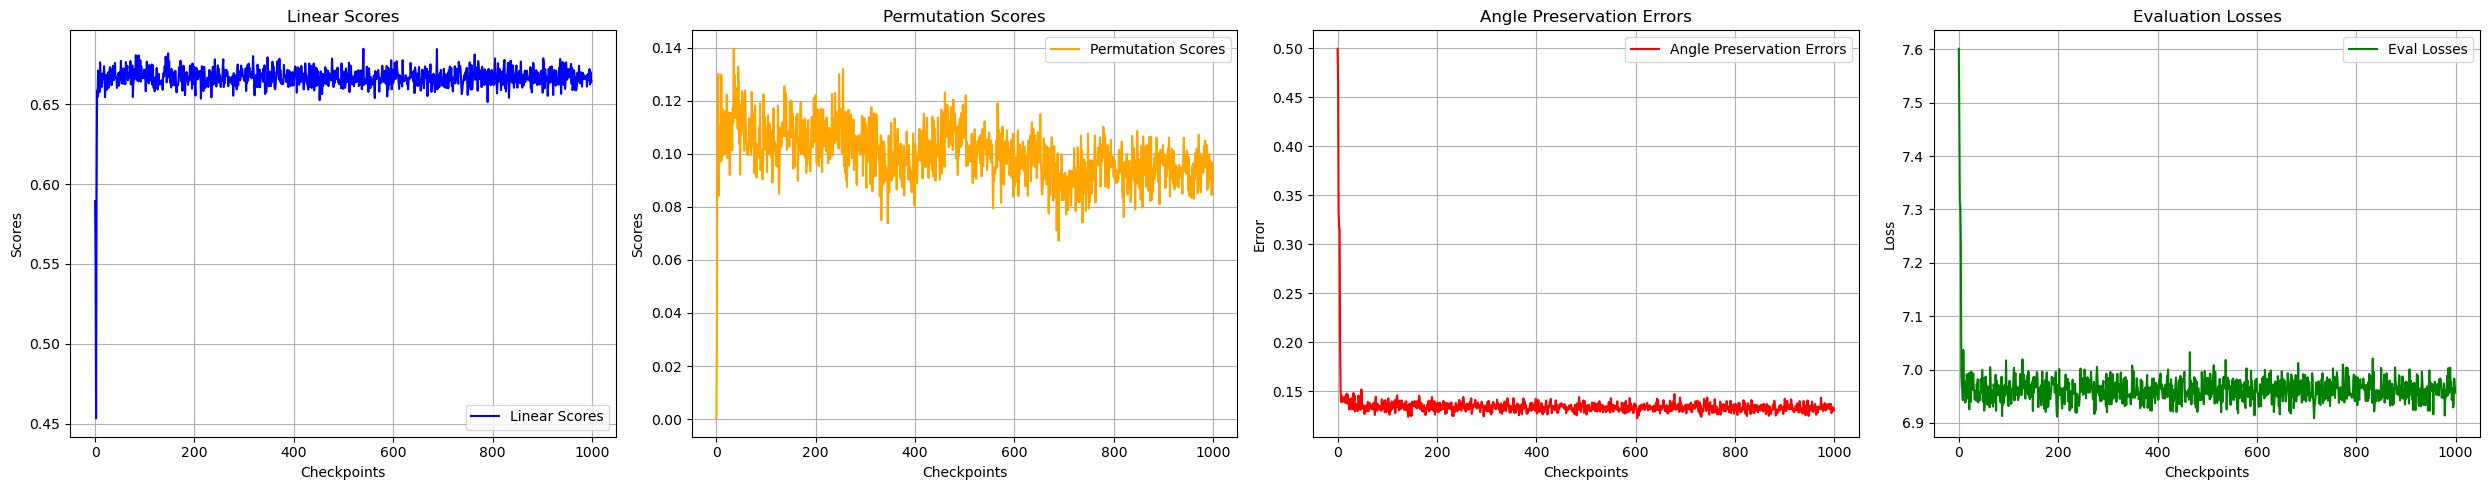

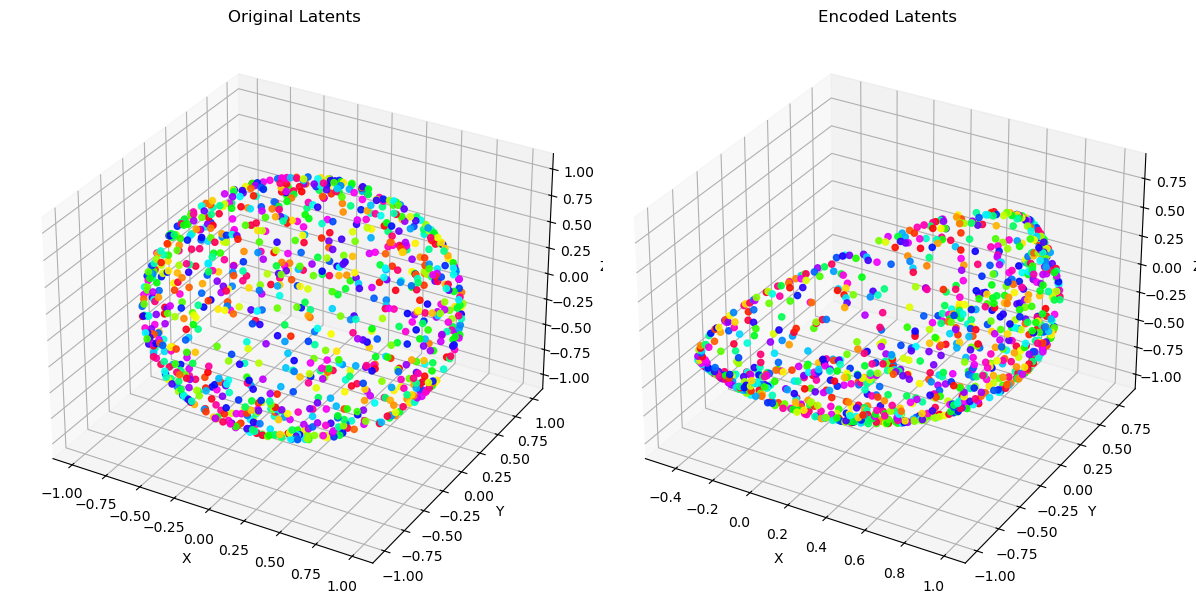

In [22]:
# 6 Dimensions

h, scores = perform_linear_experiment(6, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

plot_scores(plt, scores)

visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 11.069961547851562 Samples processed: 1 linear disentanglement: 0.9999980330467224 permutation disentanglement: 0.31117168068885803 angle_preservation_error: 0.8592520952224731
Loss: 11.004317283630371 Samples processed: 21 linear disentanglement: 0.9999980926513672 permutation disentanglement: 0.3135133683681488 angle_preservation_error: 0.827966034412384
Loss: 10.897902488708496 Samples processed: 41 linear disentanglement: 0.9999978542327881 permutation disentanglement: 0.3132616877555847 angle_preservation_error: 0.843391478061676
Loss: 10.957108497619629 Samples processed: 61 linear disentanglement: 0.9999980330467224 permutation disentanglement: 0.3120075464248657 angle_preservation_error: 0.804042637348175
Loss: 10.557334899902344 Samples processed: 81 linear disentanglement: 0.9999979138374329 permutation disentanglement: 0.31422606110572815 angle_preservation_error: 0.775826632976532
Loss: 10.37382698059082 Samples

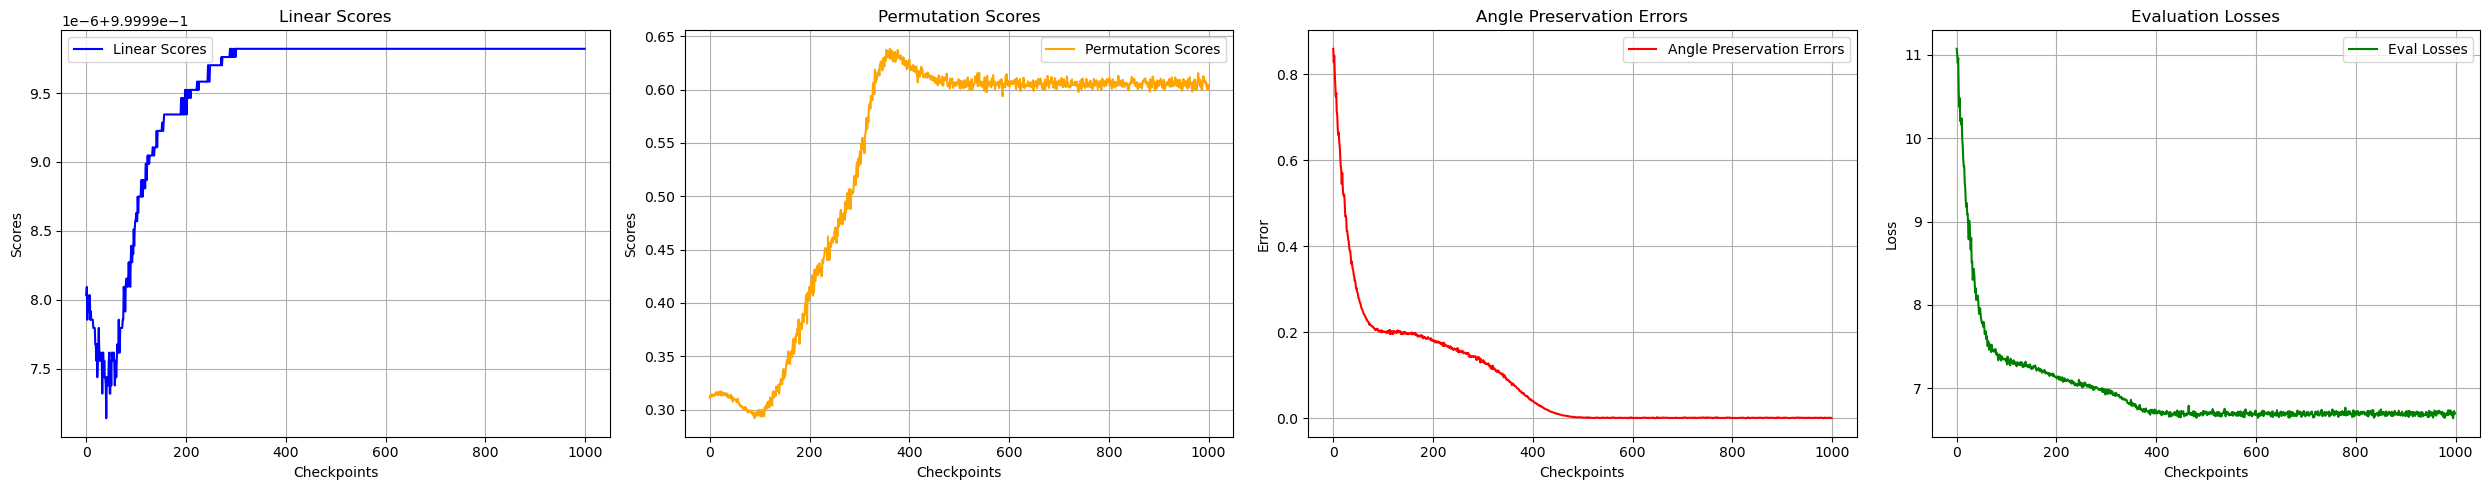

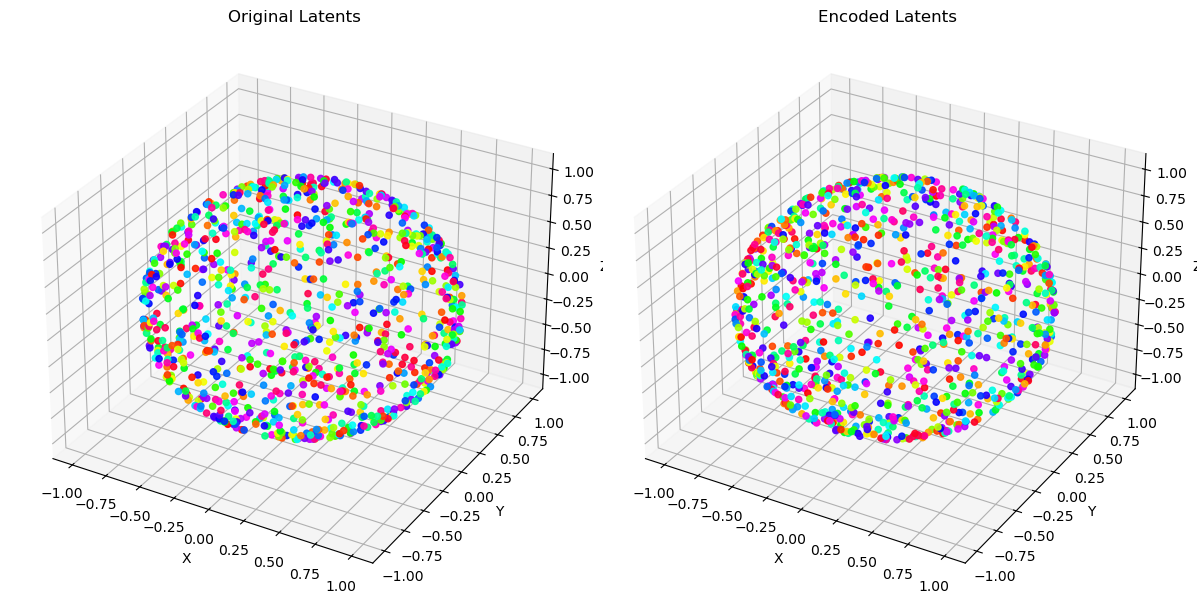

In [23]:
# 7 Dimensions

f = nn.Linear(7, 3)

h, scores = perform_linear_experiment(7, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device, f=f)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

Linear control score: 1.0
Permutation control score: 1.0
Loss: 7.596079349517822 Samples processed: 1 linear disentanglement: 0.33309200406074524 permutation disentanglement: 0.0031247336883097887 angle_preservation_error: 0.49859094619750977
Loss: 7.296352863311768 Samples processed: 21 linear disentanglement: 0.63643479347229 permutation disentanglement: 0.025635680183768272 angle_preservation_error: 0.3621901869773865
Loss: 7.040094375610352 Samples processed: 41 linear disentanglement: 0.6546651721000671 permutation disentanglement: 0.02074408531188965 angle_preservation_error: 0.1845277100801468
Loss: 6.98455810546875 Samples processed: 61 linear disentanglement: 0.6630116105079651 permutation disentanglement: 0.036800045520067215 angle_preservation_error: 0.17458926141262054
Loss: 6.942267417907715 Samples processed: 81 linear disentanglement: 0.6727375388145447 permutation disentanglement: 0.035812973976135254 angle_preservation_error: 0.1628461480140686
Loss: 6.939821243286133 

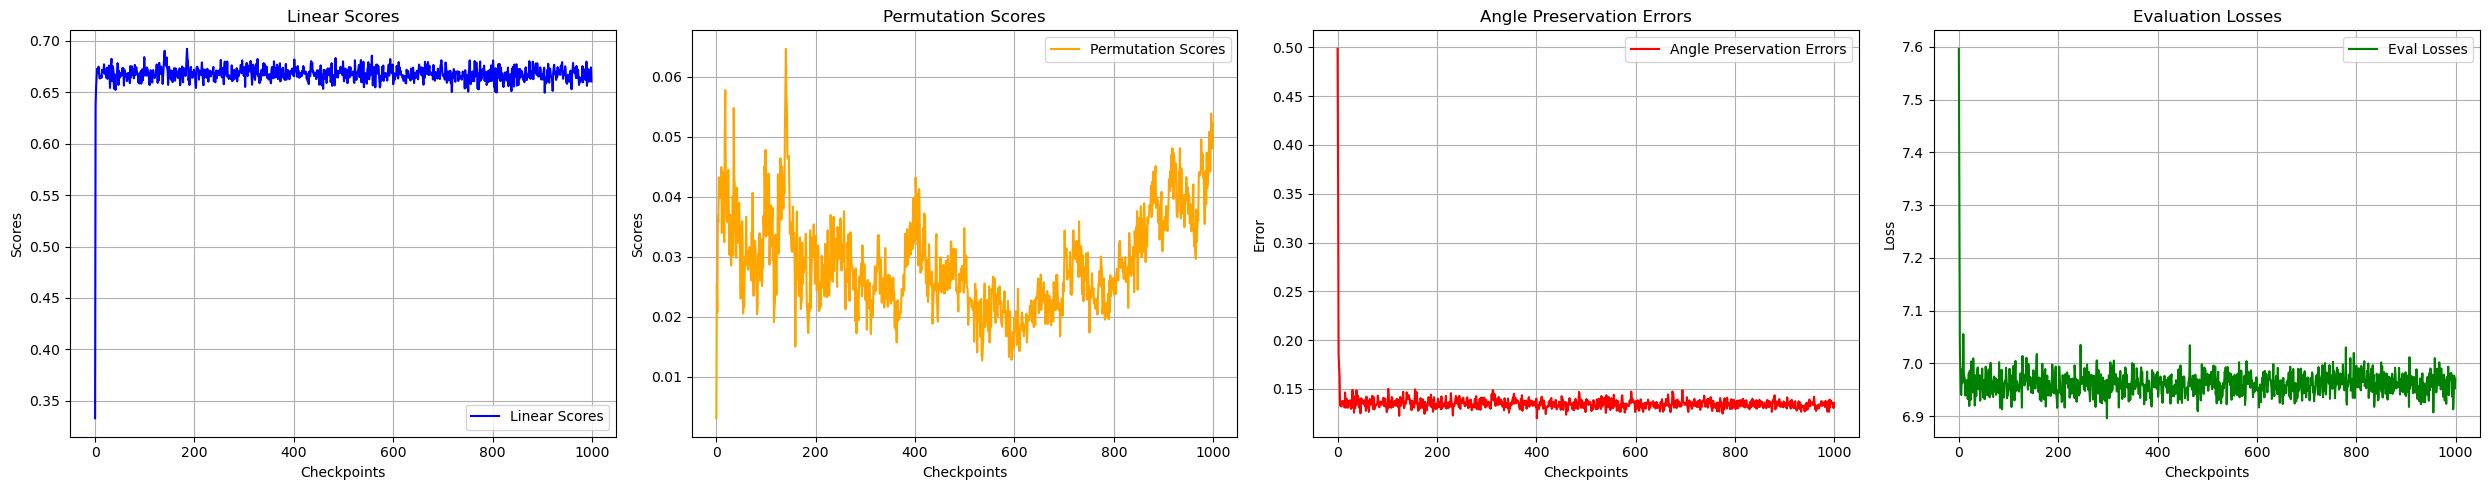

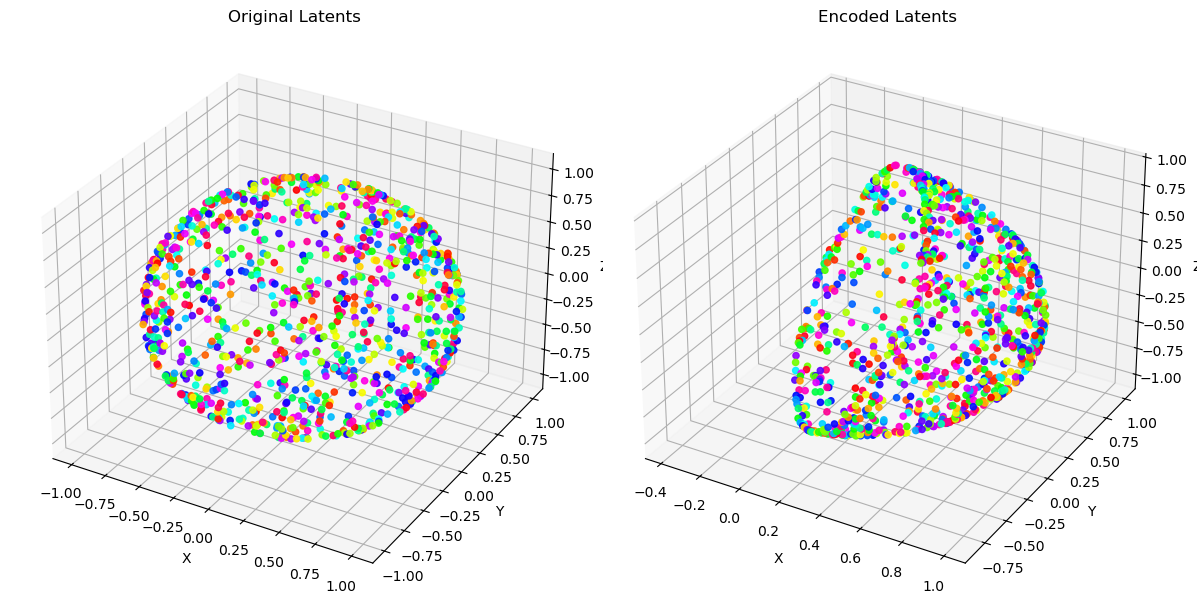

In [24]:
# 7 Dimensions
h, scores = perform_linear_experiment(7, iterations_default, batch_default, latent_dim, sample_pair_fixed, sample_uniform_fixed, tau, device)

z = sphere.uniform(1000).to(device)
z_enc = h(z)

plot_scores(plt, scores)
visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())